## **2D Diffusion**

The 2D diffusion equation:

$$  \frac{\partial{u}}{\partial{t}} = \nu \frac{\partial^{2}{u}}{\partial^{2}{x}} + \nu \frac{\partial^{2}{v}}{\partial^{2}{y}}  $$

This can be discretised as:

$$  \frac{u_{i,j}^{n + 1} - u_{i,j}^{n}}{\Delta{t}} = \nu \frac{u_{i + 1,j}^{n} - 2u_{i,j}^{n} + u_{i - 1,j}^{n}}{\Delta{x^{2}}} + \nu \frac{u_{i,j + 1}^{n} - 2u_{i,j}^{n} + u_{i,j - 1}^{n}}{\Delta{y^{2}}}  $$

We can solve for the unknown:

$$  u_{i,j}^{n + 1} = u_{i,j}^{n} + \frac{\nu\Delta{t}}{\Delta{x^{2}}}(u_{i + 1,j}^{n} - 2u_{i,j}^{n} + u_{i - 1,j}^{n}) + \frac{\nu\Delta{t}}{\Delta{y^{2}}}(u_{i,j + 1}^{n} - 2u_{i,j}^{n} + u_{i,j - 1}^{n})  $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 31
ny = 31
nt = 40
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

In [3]:
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2 

(1.0, 2.0)

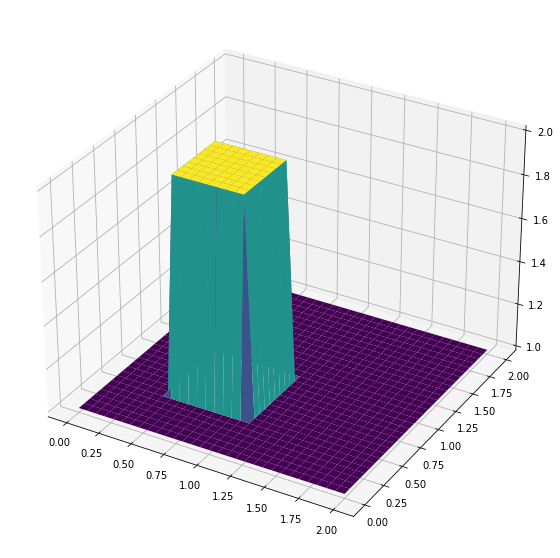

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')

ax.set_zlim(1.0, 2.0)

In [5]:
for n in range(nt + 1): 
    un = u.copy()
    
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + nu * dt / dx ** 2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + nu * dt / dy ** 2 * (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

(1.0, 2.0)

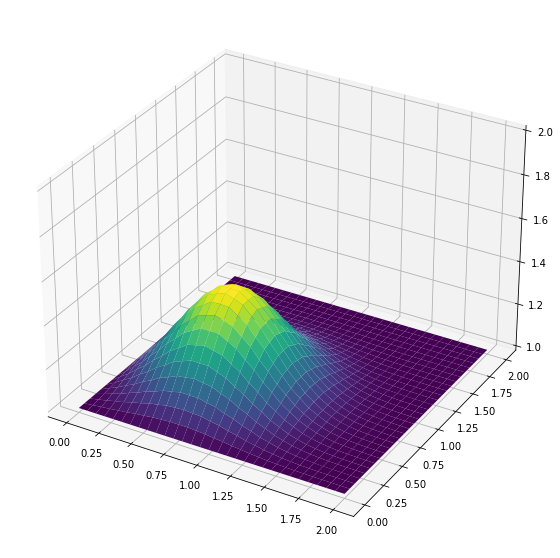

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')

ax.set_zlim(1.0, 2.0)